# Language Processing

First of all import all necessary modules

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

Function for counting the words

In [10]:
def count_words(text):
    word_count = {}
    text = text.lower()
    skip = ['.',',',';',':','"',"'"]
    for ch in skip:
        text =text.replace(ch,'')
    for word in text.split(' '):
        if word in word_count:
            word_count[word]+=1
        else:
            word_count[word] = 1
    return word_count

Faster version of previous function

In [11]:
def count_words_fast(text):
    text = text.lower()
    skip = ['.',',','"',"'",';',':']
    for ch in skip:
        text =text.replace(ch,'')
    word_count = Counter(text.split(' '))
    return word_count

Reading book from a specific path

In [12]:
def read_book(file_path):
    with open(file_path, encoding = 'utf8') as file:    
        #utf-8 encoding is preffered when using data from web
        text = file.read()
        text =text.replace('\n','').replace('\r','')
    return text

stats for all the words 

In [13]:
def word_stats(word_count):
    unique = len(word_count)
    counts = word_count.values()
    return (unique, counts) 

Now start reading all the books of different languages from the "Books" folder

In [15]:
stats = pd.DataFrame(columns = ('language', 'author', 'title', 'length', 'unique'))
total_count = 1
books = 'Books' 
for language in os.listdir(books):
    for author in os.listdir(books+'\\'+ language):
        for book in os.listdir(books+'\\'+ language+'\\'+author):
            print(books+'\\'+ language+'\\'+author+'\\'+book)
            text = read_book(books+'\\'+ language+'\\'+author+'\\'+book)
            uniq, count = word_stats(count_words_fast(text))
            stats.loc[total_count] = language, author, book, sum(count), uniq
            total_count += 1

Books\English\shakespeare\A Midsummer Night's Dream.txt
Books\English\shakespeare\Hamlet.txt
Books\English\shakespeare\Macbeth.txt
Books\English\shakespeare\Othello.txt
Books\English\shakespeare\Richard III.txt
Books\English\shakespeare\Romeo and Juliet.txt
Books\English\shakespeare\The Merchant of Venice.txt
Books\French\chevalier\L'a╠èle de sable.txt
Books\French\chevalier\L'enfer et le paradis de l'autre monde.txt
Books\French\chevalier\La capitaine.txt
Books\French\chevalier\La fille des indiens rouges.txt
Books\French\chevalier\La fille du pirate.txt
Books\French\chevalier\Le chasseur noir.txt
Books\French\chevalier\Les derniers Iroquois.txt
Books\French\de Maupassant\Boule de Suif.txt
Books\French\de Maupassant\Claire de Lune.txt
Books\French\de Maupassant\Contes de la Becasse.txt
Books\French\de Maupassant\L'inutile beautC╠º.txt
Books\French\de Maupassant\La Main Gauche.txt
Books\French\de Maupassant\La Maison Tellier.txt
Books\French\de Maupassant\La petite roque.txt
Books\Fren

### Now lets get some interpretation from our provided data

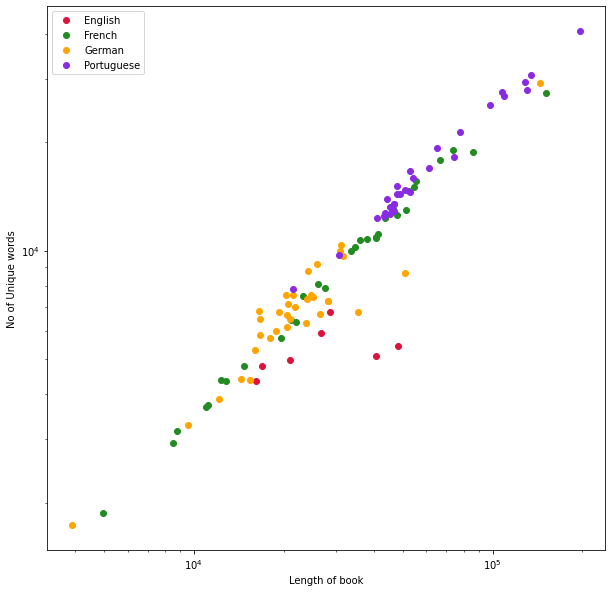

In [17]:
plt.figure(figsize = (10,10))
subset = stats[stats.language == 'English']
plt.loglog(subset.length, subset.unique, 'o', label = 'English', color ='crimson')

subset = stats[stats.language == 'French']
plt.loglog(subset.length, subset.unique, 'o', label = 'French', color ='forestgreen')

subset = stats[stats.language == 'German']
plt.loglog(subset.length, subset.unique, 'o', label = 'German', color ='orange')

subset = stats[stats.language == 'Portuguese']
plt.loglog(subset.length, subset.unique, 'o', label = 'Portuguese', color ='blueviolet')

plt.legend()
plt.xlabel('Length of book')
plt.ylabel('No of Unique words')
plt.savefig('lang_stat_plot.pdf')